In [0]:
import tensorflow.compat.v1 as tf

In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
#loading mnist data set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#shapes
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
#one hot encoding on y_train
tf.disable_eager_execution()
sess=tf.Session()

Y_train=tf.one_hot(Y_train,10)
Y_test=tf.one_hot(Y_test,10)
sess.run(Y_test)
sess.run(Y_train)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

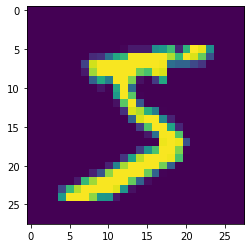

In [6]:
import matplotlib.pyplot as plt
first_image=X_train[0]
plt.imshow(first_image)
plt.show()

In [0]:
#changing shape to 2d matrix of x_train and x_test
X_train=X_train.reshape((-1,784))
X_test=X_test.reshape((-1,784))

In [8]:
X_train.shape


(60000, 784)

In [9]:
#arguments 
n_input=784
n_hidden1=256
n_hidden2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_output])),
}
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1])),
    'out':tf.Variable(tf.random_normal([n_output]))
}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#forward propagation
def fp(x,weights,biases):
  in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  out_layer1=tf.nn.relu(in_layer1)#activation function  max(a,0)
  in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
  out_layer2=tf.nn.relu(in_layer2)#activation function  max(a,0)
  output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
  return output


In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
x=tf.placeholder("float",shape=[None,784])
y=tf.placeholder(tf.int32,shape=[None,10])

In [26]:
# lets predict with random weights without any optimization

pred=fp(x,weights,biases)
prediction=tf.argmax(pred,axis=1)
true_label=tf.argmax(y,axis=1)

pd,label=sess.run([prediction,true_label],feed_dict={x:X_train,y:sess.run(Y_train)})
pd,label


(array([4, 4, 2, ..., 4, 4, 4]), array([5, 0, 4, ..., 5, 6, 8]))

In [27]:
#let found number of correct prediction
correct_pred=tf.equal(pd,label)
correct_prediction=sess.run(correct_pred)
correct_prediction

array([False, False, False, ..., False, False, False])

In [28]:
correct_prediction.sum()

5845